# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [114]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [115]:
import numpy as np

print("The shape of the x_train is ",x_train.shape)
print("The shape of the y_train is ", y_train.shape)
print("The shape of the x_test is ", x_test.shape)
print("The shape of the y_test is ", y_test.shape)
print()
print("The one image dimension is ",x_train[0].shape)
print('The number of classes is', len(np.unique(y_train)))

The shape of the x_train is  (50000, 32, 32, 3)
The shape of the y_train is  (50000, 1)
The shape of the x_test is  (10000, 32, 32, 3)
The shape of the y_test is  (10000, 1)

The one image dimension is  (32, 32, 3)
The number of classes is 100


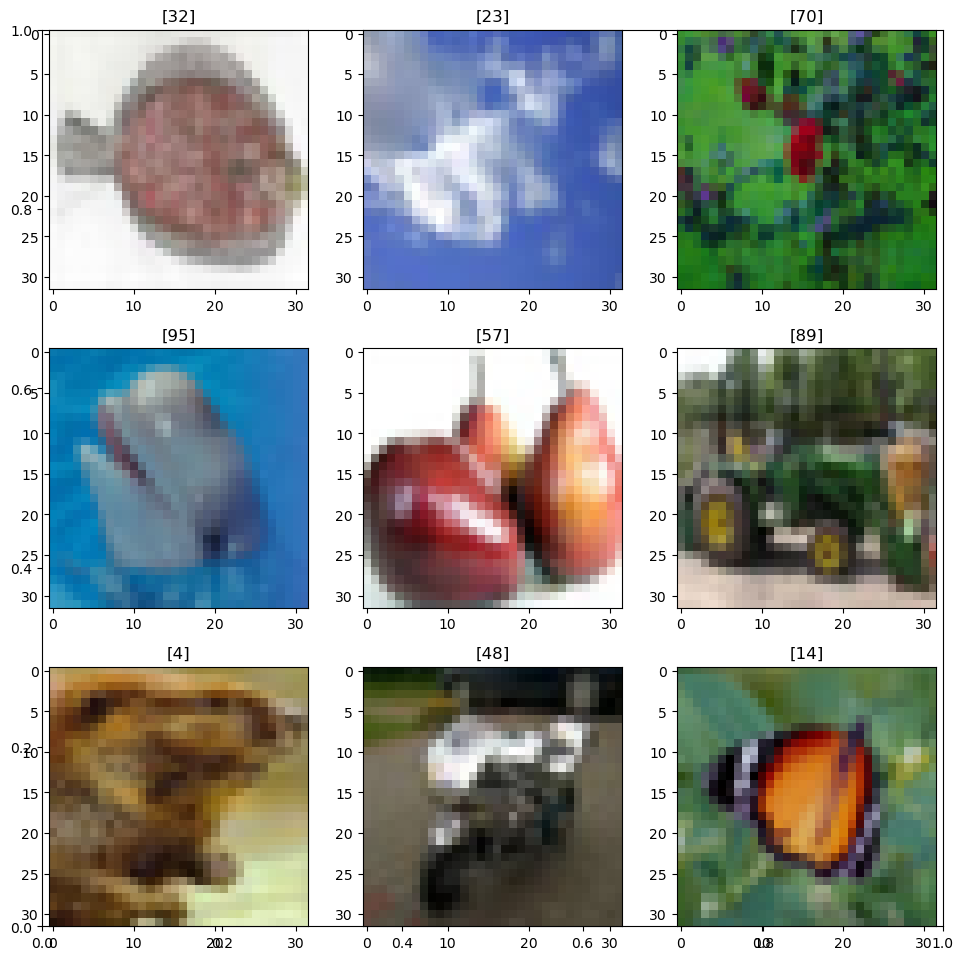

In [15]:
import matplotlib.pyplot as plt

def show_samples(data, labels): 
    plt.subplots(figsize=(10, 10)) 
    for i in range(9): 
        plt.subplot(3, 3, i+1) 
        k = np.random.randint(0, data.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(data[k]) 
    plt.tight_layout() 
    plt.show() 
  
  
show_samples(x_train, y_train) 

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [116]:
#normalization

print(np.max(x_train))
print(np.max(x_test))

x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

print(np.max(x_train))
print(np.max(x_test))

255
255
1.0
1.0


In [118]:
#OHE

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [119]:
#split the training set into training and validation
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=37,stratify=y_train)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [125]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 2304)              0         
                                                                 
 dense_35 (Dense)            (None, 50)              

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical crossentropy. I used it because it usually results in a good performance in classification task, has a clear probabilistic interpretation and prooved to be quite stable when used with softmax activation function
- <b>Optimizer:</b> Adam. I used it because it is a reliable and widely-used optimizer, so it looks like a good starting point.

In [126]:
from keras import optimizers
from keras.metrics import CategoricalAccuracy, Precision

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

# Your code here

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your 
assignment.

I used 20 epochs, because for my model we can clearly see that performance on the validation set had a chance to reach the plateu and is not going to be any better.  

- Use a batch size of 32.
- Use the validation set for validation.

In [127]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_valid,y_valid))

Epoch 1/20
1250/1250 [==============================] - 18s 14ms/step - loss: 4.0178 - acc: 0.0903 - val_loss: 3.5990 - val_acc: 0.1491
Epoch 2/20
1250/1250 [==============================] - 14s 12ms/step - loss: 3.4078 - acc: 0.1874 - val_loss: 3.2720 - val_acc: 0.2150
Epoch 3/20
1250/1250 [==============================] - 17s 14ms/step - loss: 3.1290 - acc: 0.2322 - val_loss: 3.1032 - val_acc: 0.2393
Epoch 4/20
1250/1250 [==============================] - 15s 12ms/step - loss: 2.9603 - acc: 0.2668 - val_loss: 3.0556 - val_acc: 0.2525
Epoch 5/20
1250/1250 [==============================] - 16s 13ms/step - loss: 2.8403 - acc: 0.2895 - val_loss: 2.8944 - val_acc: 0.2873
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 2.7487 - acc: 0.3044 - val_loss: 2.9174 - val_acc: 0.2804
Epoch 7/20
1250/1250 [==============================] - 17s 14ms/step - loss: 2.6716 - acc: 0.3216 - val_loss: 2.8230 - val_acc: 0.3014
Epoch 8/20
1250/1250 [==========================

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 31.09%
- <b>Other metric:</b> F1-score
- <b>Reason for selection:</b> F1 score assesses the predictive skill of a model by elaborating on its class-wise performance rather than an overall performance as done by accuracy
- <b>Value of metric:</b> 30.29%
- <b>Interpretation of metric value:</b> The F1 score combines precision and recall using their harmonic mean. A high f1 score means that precision and recall must simultaneously be high.

In [129]:
loss, accuracy= model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

from sklearn.metrics import classification_report, accuracy_score, f1_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1-Score: {f1:.4f}")

report = classification_report(y_true, y_pred_classes)
print(report)

313/313 [==============================] - 2s 8ms/step - loss: 2.8572 - acc: 0.3109
Loss:     2.86
Accuracy: 31.09%
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000178C5585550>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000178C5585550>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. 

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

The plots show the model performance during the different epochs. We can see that the overfitting is happening there: the model accuracy is growing on the training set while remaining the same for the validation set. The classification probabilities indicate how likely the chosen instance belongs to different categories. 

In [131]:
print(y_true)
print(y_pred_classes)
correct_predition_idx = 1
incorrect_prediction_idx = 0  

[49 33 72 ... 51 42 70]
[68 33 15 ... 33 88 70]


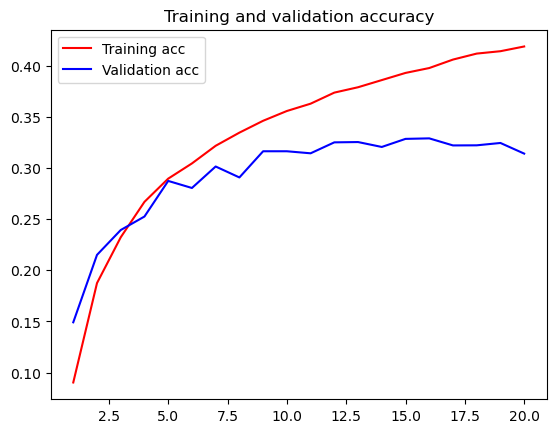

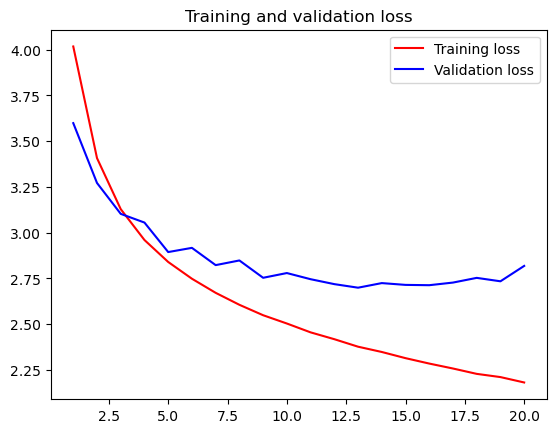

In [132]:
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

training_plot(history)
     

Text(0.5, 1.0, 'Incorrectly predicted')

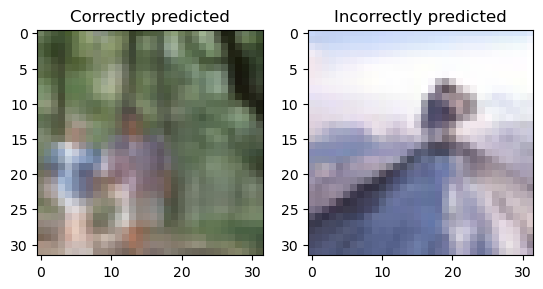

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(x_test[correct_predition_idx]) 
ax2.imshow(x_test[incorrect_prediction_idx]) 
ax1.set_title('Correctly predicted')
ax2.set_title('Incorrectly predicted')

In [135]:
print('Classification probabilities of the correctly predicted image:')
print(y_pred[correct_predition_idx])
print()
print('Classification probabilities of the incorrectly predicted image:')
print(y_pred[incorrect_prediction_idx])

Classification probabilities of the correctly predicted image:
[5.22888004e-05 3.32380994e-04 1.95716741e-03 2.94125639e-03
 1.20308809e-03 2.59896019e-03 3.88077257e-04 5.22388546e-05
 3.15770833e-03 2.07996625e-03 4.66147234e-04 8.39439221e-04
 1.61505751e-02 1.04443599e-04 8.34504317e-04 1.96379158e-04
 8.39893240e-04 1.51632668e-03 3.42622101e-02 7.04227888e-04
 2.51946199e-06 3.20355088e-04 1.79059600e-04 5.49778691e-04
 4.23847581e-07 8.00608657e-03 3.03610686e-05 3.54127632e-03
 8.15612846e-04 1.71238650e-03 1.36821764e-04 3.22354026e-03
 1.14700673e-02 3.72342288e-01 1.48989679e-03 4.15089913e-03
 9.68665758e-04 9.10021830e-03 2.00580955e-02 2.73787370e-03
 1.10397879e-04 1.14706119e-04 2.29586512e-02 6.62480481e-04
 3.21873720e-03 2.84993043e-03 1.63392618e-03 9.88018728e-05
 8.59300417e-06 2.12887695e-04 1.57659221e-02 9.09120310e-03
 1.52728971e-05 3.03129400e-06 8.33080208e-04 2.34137964e-03
 5.25245033e-02 7.04211474e-04 3.66526983e-05 2.09178906e-02
 1.49741354e-05 4.2568

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.

I decided to use the transfer learning method: start with the ResNet50 model and adjust it for cifar-100 dataset. Transfer learning is basically the reuse of a pre-trained model on a new problem. Since ResNet50 was trained for image classification I think it can be beneficial to use it as a pre-trained model for this classification task as well.  

- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [180]:
from keras.applications import ResNet50
from keras.layers import UpSampling2D, GlobalAveragePooling2D, Dropout, BatchNormalization

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))



In [156]:
print(len(resnet.layers))

175


In [185]:
for layer in resnet.layers[:172]:
    layer.trainable = False

In [186]:
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
#model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(100, activation='softmax'))

model.build(input_shape = (None, 32,32,3))
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_18  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_18 (Dropout)        (None, 2048)              0         
                                                                 
 dense_66 (Dense)            (None, 100)               204900    
                                                                 
Total params: 23,792,612
Trainable params: 208,996
Non-trainable params: 23,583,616
_________________________________________________________________


In [187]:
from keras import optimizers
from keras.metrics import CategoricalAccuracy, Precision

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

# Your code here

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [188]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_valid,y_valid))

Epoch 1/20
1250/1250 [==============================] - 294s 231ms/step - loss: 4.6736 - acc: 0.0536 - val_loss: 4.1875 - val_acc: 0.0880
Epoch 2/20
1250/1250 [==============================] - 262s 209ms/step - loss: 4.2312 - acc: 0.0843 - val_loss: 4.1435 - val_acc: 0.0936
Epoch 3/20
1250/1250 [==============================] - 252s 202ms/step - loss: 4.0978 - acc: 0.0995 - val_loss: 4.0238 - val_acc: 0.1069
Epoch 4/20
1250/1250 [==============================] - 254s 203ms/step - loss: 4.0139 - acc: 0.1088 - val_loss: 4.0163 - val_acc: 0.1172
Epoch 5/20
1250/1250 [==============================] - 255s 204ms/step - loss: 3.9450 - acc: 0.1145 - val_loss: 3.9874 - val_acc: 0.1224
Epoch 6/20
1250/1250 [==============================] - 147s 118ms/step - loss: 3.8990 - acc: 0.1230 - val_loss: 3.9653 - val_acc: 0.1273
Epoch 7/20
1250/1250 [==============================] - 160s 127ms/step - loss: 3.8491 - acc: 0.1295 - val_loss: 3.9234 - val_acc: 0.1308
Epoch 8/20
1250/1250 [============

In [189]:
loss, accuracy= model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

from sklearn.metrics import classification_report, accuracy_score, f1_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1-Score: {f1:.4f}")

report = classification_report(y_true, y_pred_classes)
print(report)

313/313 [==============================] - 52s 166ms/step - loss: 3.8171 - acc: 0.1630
Loss:     3.82
Accuracy: 16.30%
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000017ECD2C0F70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000017ECD2C0F70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

In [194]:
print(y_true)
print(y_pred_classes)
correct_predition_idx = 4
incorrect_prediction_idx = 0  

[49 33 72 ... 51 42 70]
[17 63  7 ... 60 81 54]


In [193]:
for i in range(len(y_true)):
    print(y_true[i], ' ', y_pred_classes[i])

49   17
33   63
72   7
51   49
71   71
92   69
15   63
14   21
23   23
0   85
71   97
75   75
81   81
69   69
40   24
43   23
92   28
97   14
70   78
53   53
70   54
49   85
75   75
29   71
21   21
16   31
39   39
8   8
8   99
70   20
20   20
61   64
41   41
93   73
56   69
73   73
58   91
11   85
25   85
37   13
63   7
24   76
49   85
73   69
56   56
22   22
41   98
58   58
75   46
17   57
4   82
6   7
9   94
57   53
2   85
32   97
71   23
52   52
42   42
69   68
77   16
27   23
15   7
65   33
7   92
35   78
43   88
82   59
63   63
92   70
66   99
90   85
67   39
91   91
32   97
32   59
82   82
10   0
77   35
22   61
71   71
78   85
54   69
6   24
29   51
89   19
78   95
33   47
11   58
67   73
22   61
18   33
27   63
21   68
13   13
21   85
50   7
75   7
37   68
35   85
26   29
83   36
47   47
95   41
43   7
69   69
76   76
17   17
57   67
59   76
25   25
20   17
27   1
0   98
9   69
71   71
8   41
43   80
57   0
56   56
85   85
10   97
19   77
92   62
33   13
20   56
21   85
50   31

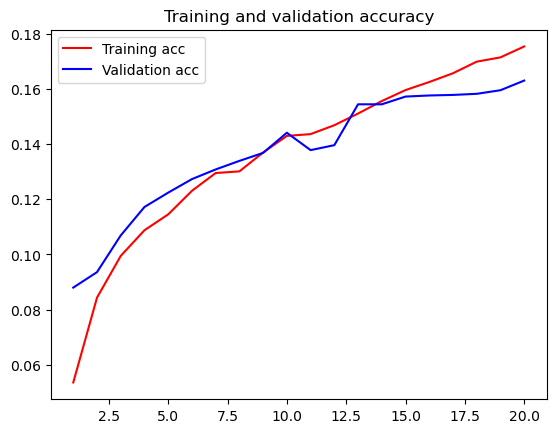

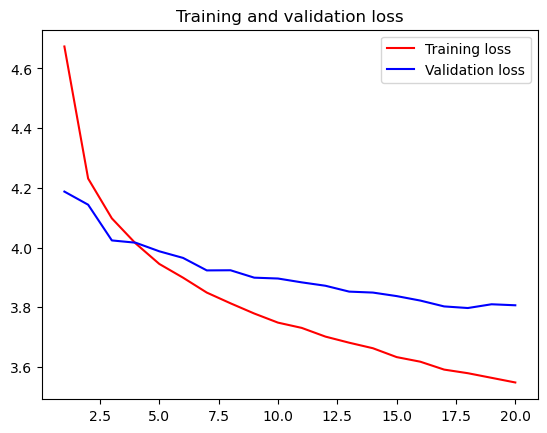

In [195]:
training_plot(history)

Text(0.5, 1.0, 'Incorrectly predicted')

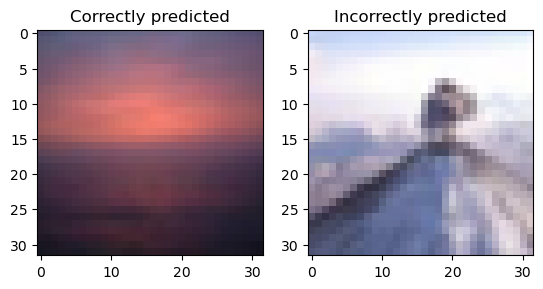

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(x_test[correct_predition_idx]) 
ax2.imshow(x_test[incorrect_prediction_idx]) 
ax1.set_title('Correctly predicted')
ax2.set_title('Incorrectly predicted')

In [197]:
print('Classification probabilities of the correctly predicted image:')
print(y_pred[correct_predition_idx])
print()
print('Classification probabilities of the incorrectly predicted image:')
print(y_pred[incorrect_prediction_idx])

Classification probabilities of the correctly predicted image:
[5.9340522e-03 5.2214309e-04 3.5216315e-05 4.7641834e-06 1.7576081e-04
 8.6246093e-04 2.3554858e-08 2.7584143e-05 5.7174482e-05 2.5847375e-03
 1.5507790e-04 2.1012946e-05 1.4042786e-04 7.7094110e-06 1.4412219e-06
 4.6056535e-05 5.2329110e-06 1.8532228e-05 3.4199376e-04 1.8765786e-04
 6.4221967e-05 9.2405128e-07 9.6548254e-05 2.3054099e-01 8.3014138e-06
 1.1734804e-03 1.9768294e-04 7.7340432e-04 1.3120617e-03 1.8553634e-04
 1.6225458e-03 1.7819864e-04 2.7636255e-03 4.4225911e-03 7.3450988e-06
 1.1112795e-06 4.6377849e-05 5.8376445e-06 5.8043956e-05 1.5283615e-05
 8.4761843e-05 2.4833661e-04 3.4650639e-05 3.4028038e-05 4.1054911e-04
 8.6648040e-05 3.2526186e-05 8.4057194e-04 4.4375718e-11 3.6019608e-02
 2.9713500e-04 5.3933090e-06 6.8614964e-10 1.5989360e-03 3.4569457e-04
 3.3995815e-04 5.8896643e-05 2.4037621e-05 8.9308293e-07 5.9666418e-05
 2.6663398e-02 5.9651284e-05 4.3929624e-04 1.5165321e-04 7.7276954e-06
 1.4830158e-04

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? No, it doesn't
- Why do you think this is? 
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

The accuracy of the first model on the test set is 31.09%, while the accuracy of the more advanced one is only 16.30%. The F1 score is 30.28% and  14.46%.  The model performance did not improve for this number of epochs, but we can see that the first model was overfitting and the validation accuracy stuck at the plateau of 30%, while there is evident growth of the validation accuracy for the second model. I believe there is a potential for improvement. Firstly, we will have better results if train the second model longer. It has 10 times more parameters and that is why the picked number of the epochs was not enough. Secondly, it will be interesting to experiment with a data augmentation technique. Also, the first model can be improved with a Dropout layer which will prevent the model from the overfitting. 

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.